In [1]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:


# Load the Books about US politics networks dataset
G = nx.read_gml('../inputs/polbooks/polbooks.gml')

# Print some information about the graph
#print(nx.info(G))
pos = nx.spring_layout(G)

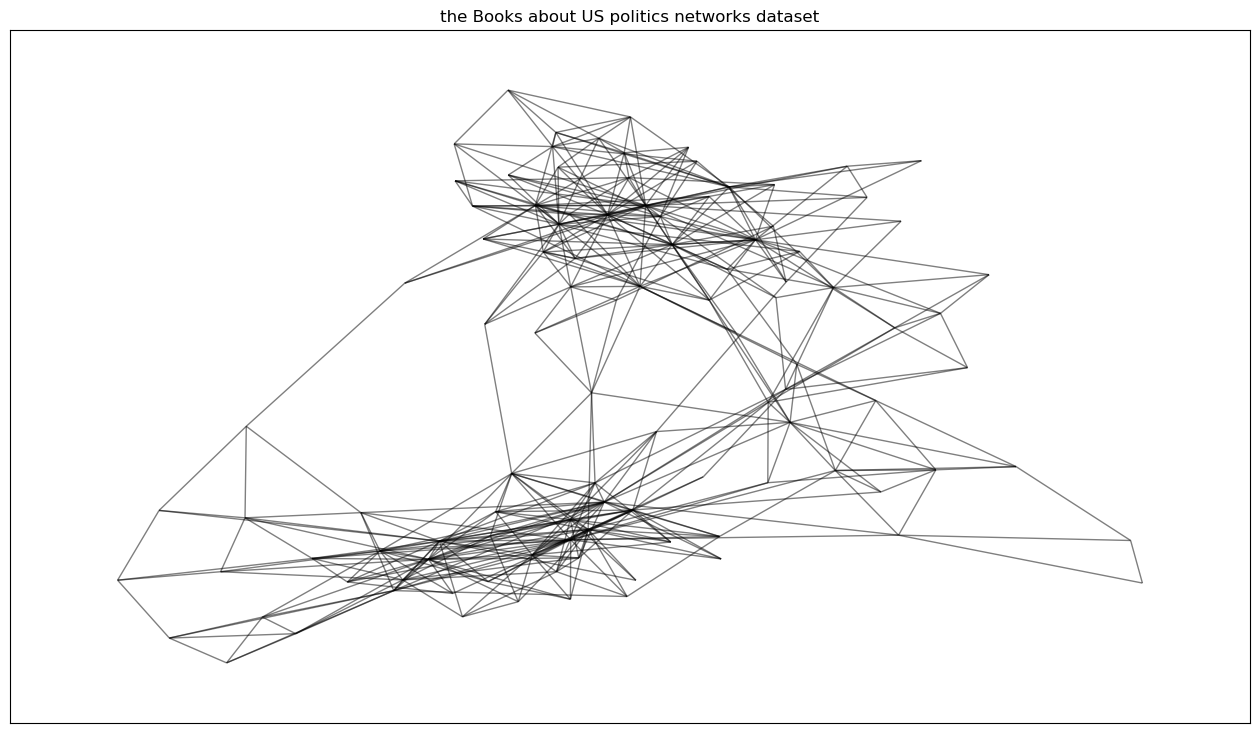

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from collections import defaultdict

def draw_communities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the node and the value at the position is the node's community membership.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """
    fig, ax = plt.subplots(figsize=(16, 9))

    # Convert membership list to a dict where key=community, value=list of nodes in community
    community_dict = defaultdict(list)
    for node, community in enumerate(membership):
        community_dict[community].append(node)

    # Normalize number of communities for choosing a color
    norm = colors.Normalize(vmin=0, vmax=len(community_dict.keys()))

    for community, members in community_dict.items():
        # Filter nodes that have a position defined
        members_with_position = [node for node in members if node in pos]
        if len(members_with_position) > 0:
            # Set different color, size, and alpha values for each community
            node_color = cm.jet(norm(community))
            node_size = 800
            node_alpha = 0.9
            if community == 0:  # Modify the condition for different communities
                node_color = "red"
                node_size = 1000
                node_alpha = 1.0

            nx.draw_networkx_nodes(G, pos,
                                   nodelist=members_with_position,
                                   node_color=node_color,
                                   node_size=node_size,
                                   alpha=node_alpha,
                                   ax=ax)

    # Draw edges (social connections) and show the final plot
    plt.title("the Books about US politics networks dataset")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    plt.show()


# True labels of the group each node ended up in.
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]

draw_communities(G, y_true, pos)


In [6]:
import numpy as np

def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Create a mapping between actual node indices and consecutive integer indices
    node_map = {node: index for index, node in enumerate(G.nodes())}

    # Initialize edge matrix with zeros
    num_nodes = len(G.nodes())
    edge_mat = np.zeros((num_nodes, num_nodes), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            edge_mat[node_map[node]][node_map[neighbor]] = 1
        edge_mat[node_map[node]][node_map[node]] = 1

    return edge_mat

edge_mat = graph_to_edge_matrix(G)
print(edge_mat)


[[1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]


In [7]:
k_clusters = 3
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

C:\Users\zambogo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\zambogo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Check to see how many cluster the affinity propagation algo thinks there is
cluster_centers_indices = algorithms['affinity'].cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)

21


In [9]:
# The results
algorithms['affinity'].labels_

array([ 0,  0,  0,  2,  0,  0,  0,  0,  1,  5,  4,  2,  3,  9,  5,  4,  4,
        9,  4,  4, 10,  4,  9, 12,  5, 20,  5, 12,  6,  6,  7, 16,  9,  8,
        8,  8, 12,  8,  8,  8,  9, 12,  9,  9,  9,  5,  9, 12, 10, 10, 20,
       11, 11,  5, 12,  4, 10, 10, 11, 13, 13, 17, 13, 13, 11, 11, 14, 20,
       11, 11,  6, 16, 15, 16, 16, 16, 16, 16, 16, 16,  6, 18, 16, 16, 18,
        6, 18, 19,  6, 18,  6, 19,  6, 17, 17, 17, 18, 18, 19, 13, 18, 17,
       17, 20, 20], dtype=int64)

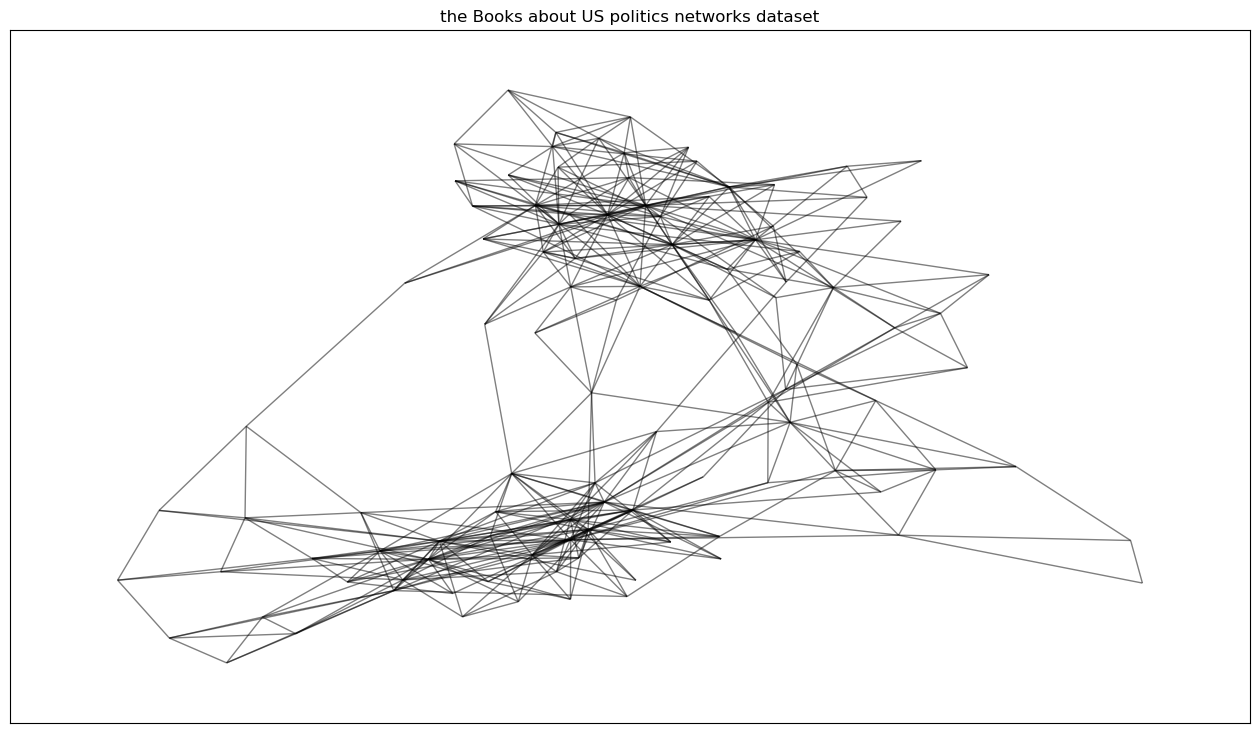

In [10]:
draw_communities(G, algorithms['affinity'].labels_, pos)

In [11]:
algorithms['kmeans'].labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2])

In [12]:

nmi_results = []
ars_results = []

y_true_val = np.array(y_true)

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


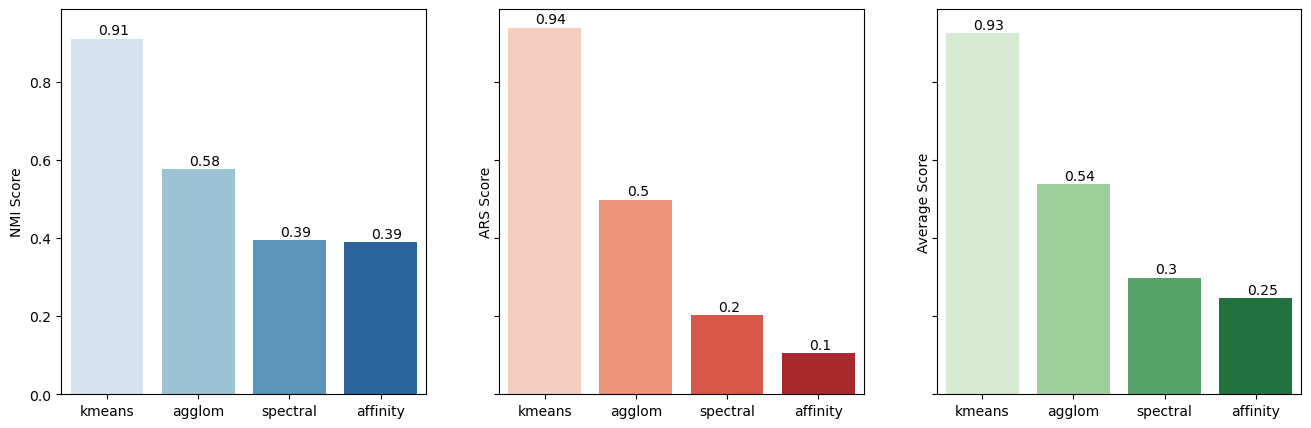

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))
xlabels = list(algorithms.keys())
x = np.arange(len(xlabels))
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = list(algorithms.keys())

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.show()